In [27]:
import pandas as pd

df = pd.read_csv('C:/Users/cturner/Documents/Development/Python module/not work/videos-stats.csv', parse_dates=['Published At'])



In [28]:
mask = df['Published At'].between('2020-1-1', '2023-1-1')
df = df.loc[mask]
df = df.query("Keyword in ['physics', 'computer science', 'data science', 'machine learning']")

df.tail()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1874,1874,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,2022-02-01,machine learning,1861.0,184.0,37959.0
1875,1875,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,2021-05-11,machine learning,9615.0,648.0,319957.0
1876,1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1878,1878,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0
1880,1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN


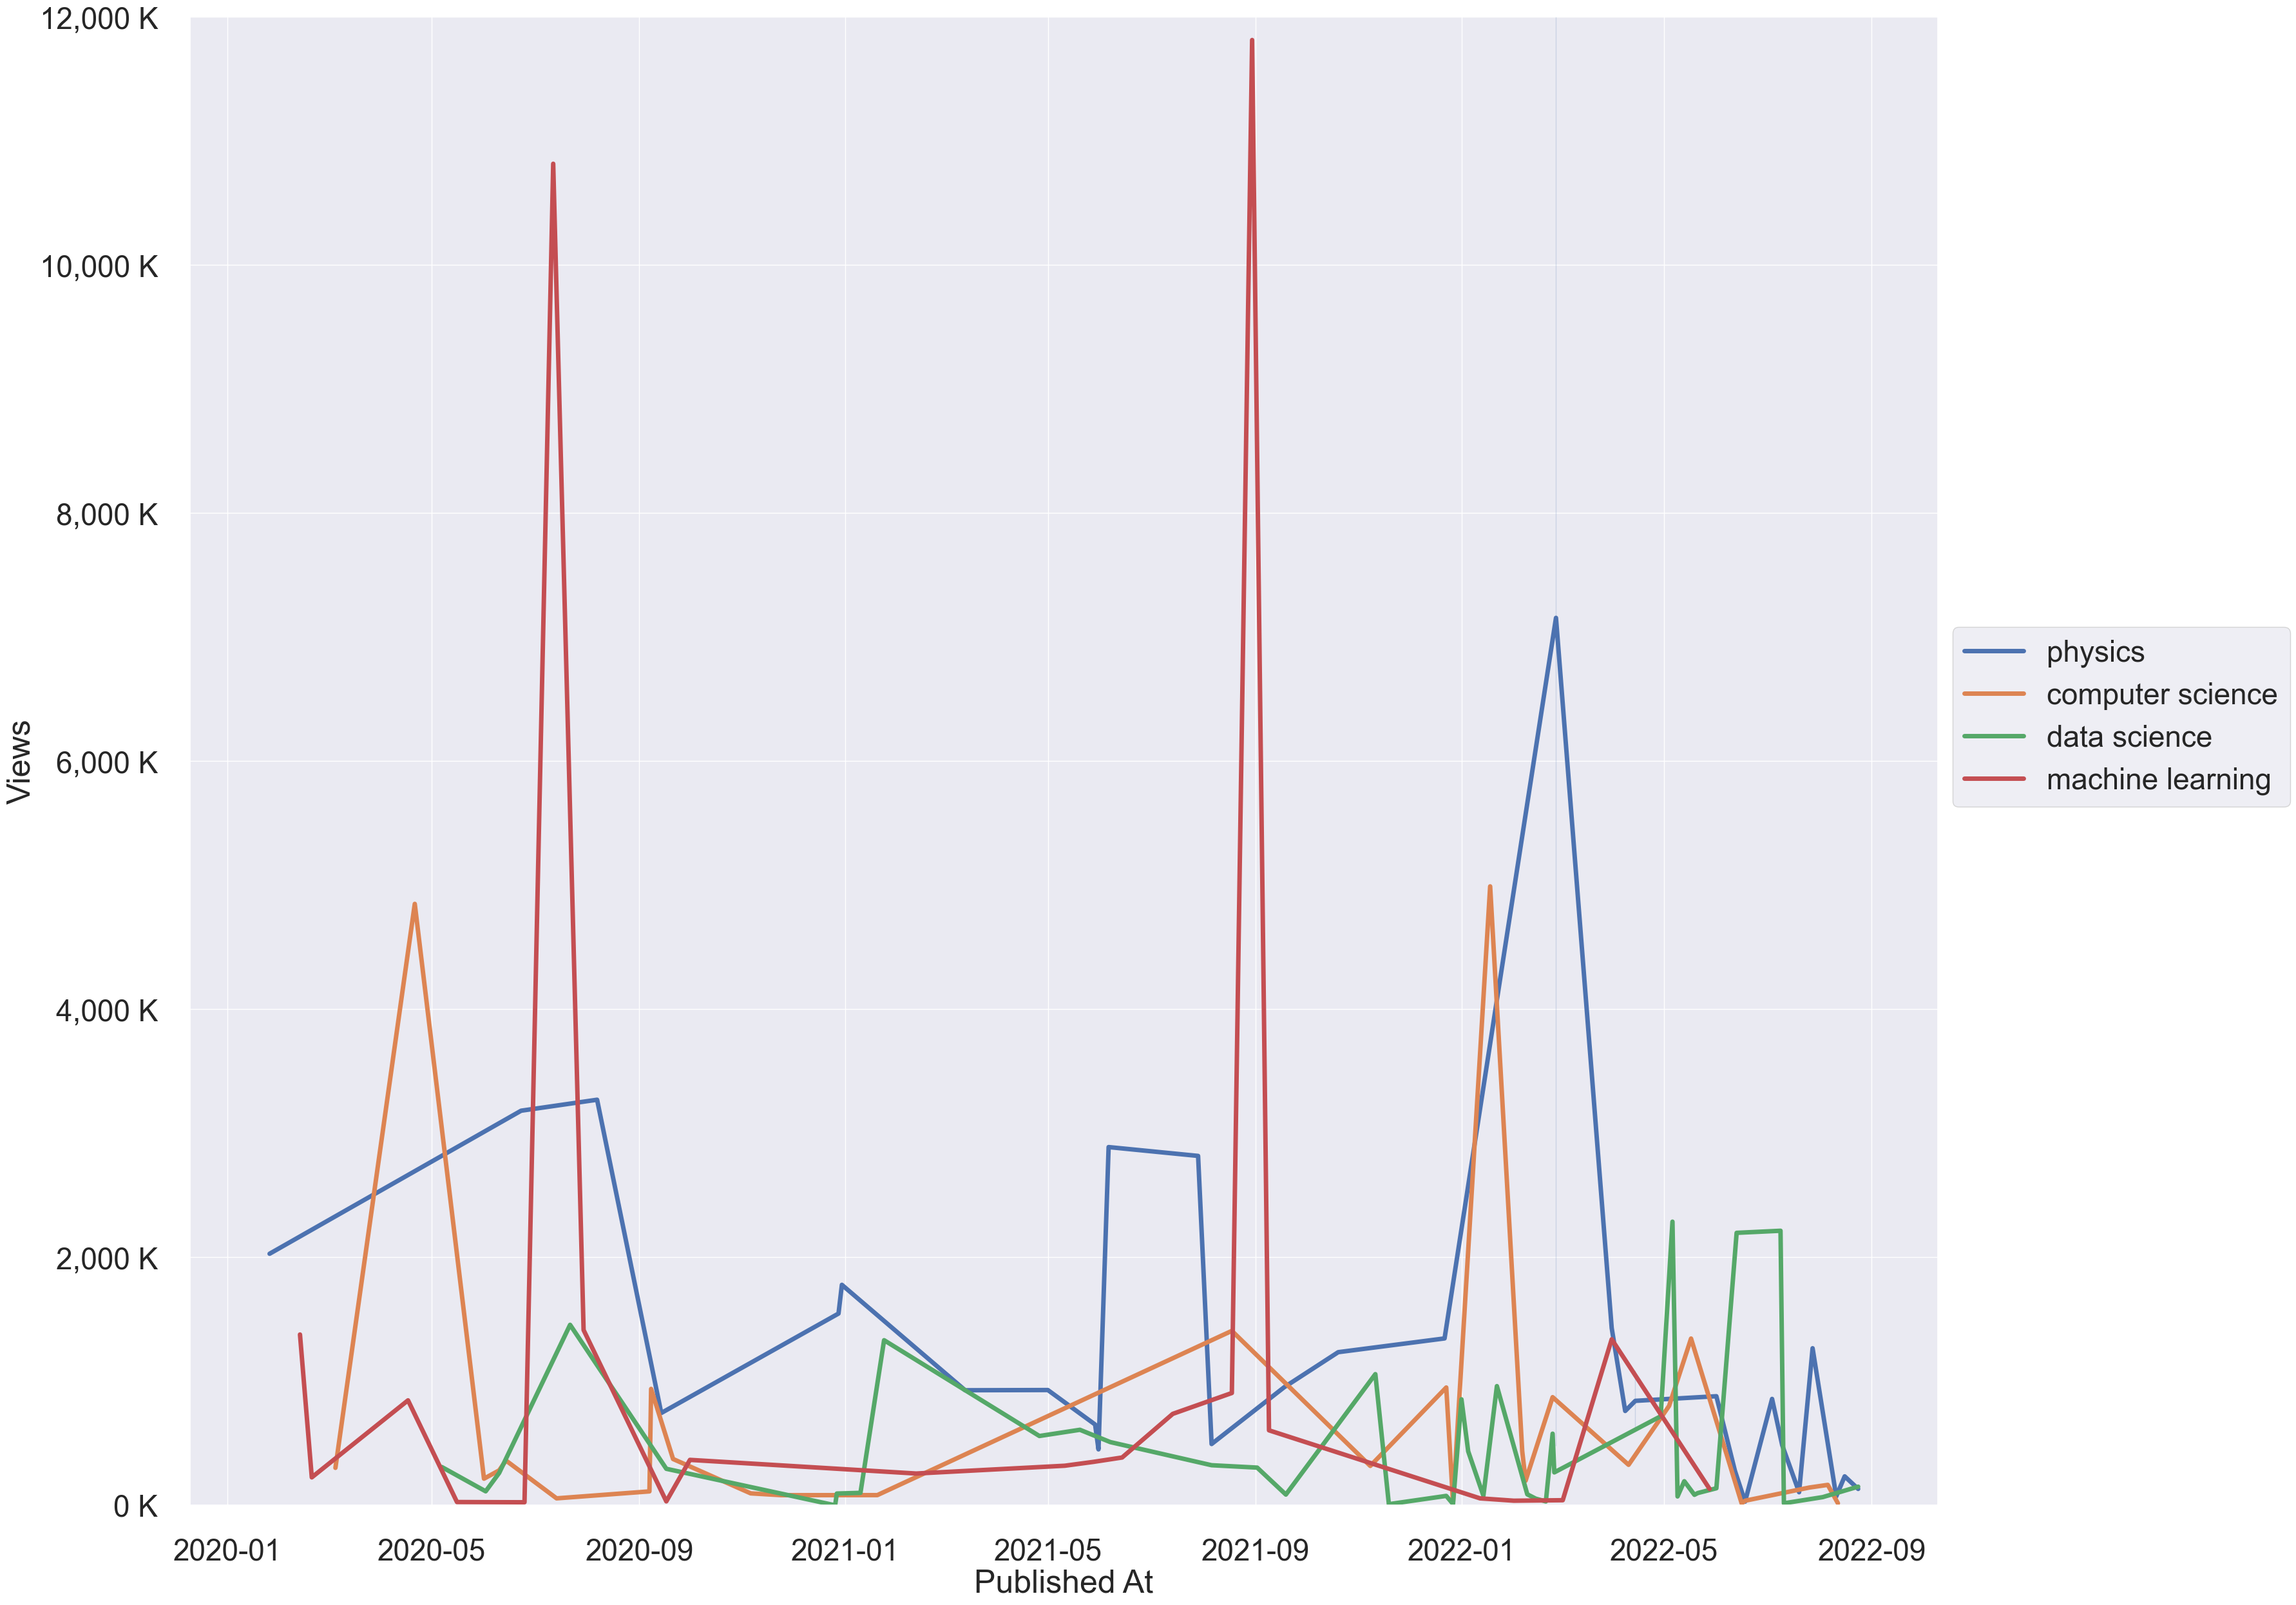

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.axes import Axes
import seaborn as sns

#some params
plt.rcParams["figure.figsize"] = (35,30)
plt.rcParams.update({'font.size': 25})

#some styling
label_format = '{:,.0f}'
sns.set_context("poster")
sns.set(font_scale=3)

#plot
fig, ax = plt.subplots()
#df.groupby('Keyword').plot(x='Published At', y='Views', ax=ax, legend=False)
sns.lineplot(data=df, x='Published At', y='Views', palette='deep', hue='Keyword', linewidth = 5.0, ax=ax)

#ytick label formatting
y_ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(y_ticks_loc))
ylabels = [label_format.format(y) + ' K' for y in ax.get_yticks()/1000]

#set ytick labels
ax.set_yticklabels(ylabels)

#pad tick labels
ax.tick_params(axis='y', pad=30)
ax.tick_params(axis='x', pad=30)

#set y lims
ax.set_ylim(0,12_000_000)

# get the legend object
leg = ax.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(5.0)

#move legend
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.6))